<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/dad_apis_webscraping_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework III: API's and Webscraping

In [44]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import datetime

#### Question 1

Using the LastFM API, look up your five favorite artists (using [here](https://www.last.fm/api/show/artist.getTopAlbums)) top albums and create a DataFrame of your results formatted as shown below:

| Artist | Album | Album Art Link |
| ------ | ------ | ------------  |
| Riff Raff | Pink Panther | www.lastfm.com/panther |
| Slayer | South of Heaven | www.lastfm.com/slay |

In [45]:
api_key = '6cac624f7267d913379d6d61963dbbad'
base_url = 'https://ws.audioscrobbler.com/2.0/'

In [46]:
artists = ['Kanye West', 'The Beatles', 'Bad Bunny', 'Silvio Rodriguez', 'Frank Ocean']
top_albums = []
for artist in artists:
    payload = {
        'method': 'artist.gettopalbums',
        'artist': artist,
        'api_key': api_key,
        'format': 'json',
    }

    r = requests.get(base_url, params=payload)
    data = r.json()
    album = data['topalbums']['album'][0]
    top_albums.append({
            'Artist': artist,
            'Album': album['name'],
            'Album Art': album['url']
        })

In [47]:
df_albums = pd.DataFrame(top_albums)
df_albums

,Artist,Album,Album Art
0,Kanye West,Graduation,https://www.last.fm/music/Kanye+West/Graduation
1,The Beatles,Abbey Road (Remastered),https://www.last.fm/music/The+Beatles/Abbey+Ro...
2,Bad Bunny,Un Verano Sin Ti,https://www.last.fm/music/Bad+Bunny/Un+Verano+...
3,Silvio Rodriguez,AL FINAL DE ESTE VIAJE...,https://www.last.fm/music/SILVIO+RODR%C3%8DGUE...
4,Frank Ocean,Blonde,https://www.last.fm/music/Frank+Ocean/Blonde


#### Question 2

Using the LastFM API, look up tracks similar (using [this](https://www.last.fm/api/show/track.getSimilar)) to Quicksand's song Fazer.  Assemble the results in a DataFrame with the format given below:

| Artist | Song | Playcount | Match % | Duration |
| ------ | ------- | ------ | ------ | ---------- |
| quicksand | can opener | 98218 | 1.0 | 219 |

In [48]:
payload = {
    'method': 'track.getsimilar',
    'artist': 'Quicksand',
    'track': 'Fazer',
    'api_key': api_key,
    'format': 'json',
    'limit': 5
}

r = requests.get(base_url, params=payload)
data = r.json()
data

{'similartracks': {'track': [{'name': 'Dine Alone',
    'playcount': 259948,
    'mbid': '42df1768-1bf4-3fad-b672-4d5119e03d65',
    'match': 1.0,
    'url': 'https://www.last.fm/music/Quicksand/_/Dine+Alone',
    'streamable': {'#text': '0', 'fulltrack': '0'},
    'duration': 208,
    'artist': {'name': 'Quicksand',
     'mbid': '3c9f8bef-a658-4204-9ee8-7e95d2535b32',
     'url': 'https://www.last.fm/music/Quicksand'},
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b4

In [49]:
similar_tracks = []

for track in data['similartracks']['track']:
    similar_tracks.append({
        'Artist': track['artist']['name'],
        'Song': track['name'],
        'Playcount': track.get('playcount', 'N/A'),
        'Match %': round(track['match'], 3) * 100,
        'Duration': track['duration']
    })

In [50]:
df_similar_tracks = pd.DataFrame(similar_tracks)
df_similar_tracks

,Artist,Song,Playcount,Match %,Duration
0,Quicksand,Dine Alone,259948,100.0,208
1,Quicksand,Head To Wall,213145,45.4,187
2,Helmet,In the Meantime,641295,17.8,186
3,Helmet,Give It,270355,15.6,0
4,At the Drive-In,Arcarsenal,2017062,13.4,175


#### Question 3

arXiv is an open source space for academic papers to be published.  They have a freely accessible API [here](https://info.arxiv.org/help/api/user-manual.html#arxiv-api-users-manual).  In order to parse the responses, you will need to use the BeautifulSoup library and turn the text of the response into a soup object that is then searched.

Your objective is to write a function that takes in a search term and returns a `DataFrame` with the article date, title, authors, summary, and article url as columns of the `DataFrame`.

In [51]:
search_term = 'artificial intelligence'
url = f'http://export.arxiv.org/api/query?search_query=all:{search_term}&start=0&max_results=5'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'xml')

In [52]:
entries = soup.find_all('entry')
data = []

for entry in entries:
    title = entry.title.text.strip()
    authors = ', '.join([author.find('name').text for author in entry.find_all('author')])
    summary = entry.summary.text.strip()
    date = entry.published.text
    link = entry.id.text

    data.append({
        'Title': title,
        'Authors': authors,
        'Summary': summary,
        'Date': date,
        'URL': link
    })

In [53]:
df_arxiv = pd.DataFrame(data)
df_arxiv

,Title,Authors,Summary,Date,URL
0,The Governance of Physical Artificial Intellig...,"Yingbo Li, Anamaria-Beatrice Spulber, Yucong Duan",Physical artificial intelligence can prove to ...,2023-04-06T08:26:38Z,http://arxiv.org/abs/2304.02924v1
1,Does an artificial intelligence perform market...,Takanobu Mizuta,Who should be charged with responsibility for ...,2020-05-21T07:00:31Z,http://arxiv.org/abs/2005.10488v1
2,Impact of Artificial Intelligence on Economic ...,Tshilidzi Marwala,Artificial intelligence has impacted many aspe...,2015-07-01T16:26:21Z,http://arxiv.org/abs/1509.01213v1
3,The case for psychometric artificial general i...,Mark McPherson,A short review of the literature on measuremen...,2020-12-27T23:45:03Z,http://arxiv.org/abs/2101.02179v1
4,Proceedings of the Thirteenth Conference on Un...,"Dan Geiger, Prakash Shenoy",This is the Proceedings of the Thirteenth Conf...,2013-04-13T20:44:25Z,http://arxiv.org/abs/1304.3846v1


#### Question 4

The world bank has a Python wrapper for its api called `wbgapi`.  Examine the documentation [here](https://pypi.org/project/wbgapi/) and chose an endpoint(s) to query.  Find at least two endpoints of interest and create visualizations of this data.  Write a sentence or two about what you've found.

In [57]:
!pip install wbgapi

In [58]:
import wbgapi as wb

In [64]:
gdp = wb.data.DataFrame('NY.GDP.PCAP.CD', ['USA', 'BRA', 'IND'], time=range(2010, 2021))
gdp = gdp.transpose()
gdp.columns = ['USA', 'Brazil', 'India']
gdp.index.name = 'Year'

In [65]:
pop = wb.data.DataFrame('SP.POP.TOTL', ['USA', 'BRA', 'IND'], time=range(2010, 2021))
pop = pop.transpose()
pop.columns = ['USA', 'Brazil', 'India']
pop.index.name = 'Year'

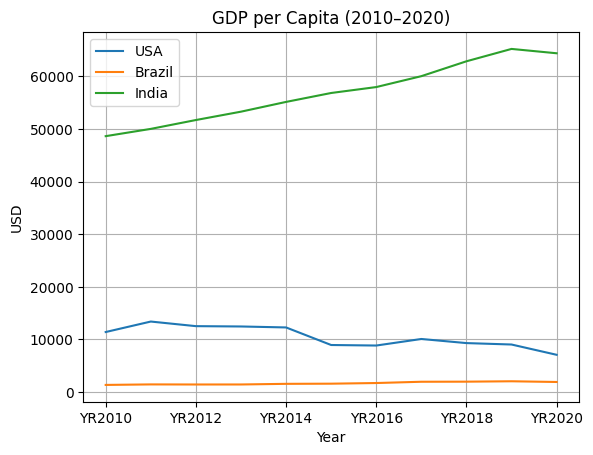

In [66]:
gdp.plot(title='GDP per Capita (2010–2020)', ylabel='USD')
plt.grid(True)
plt.show()

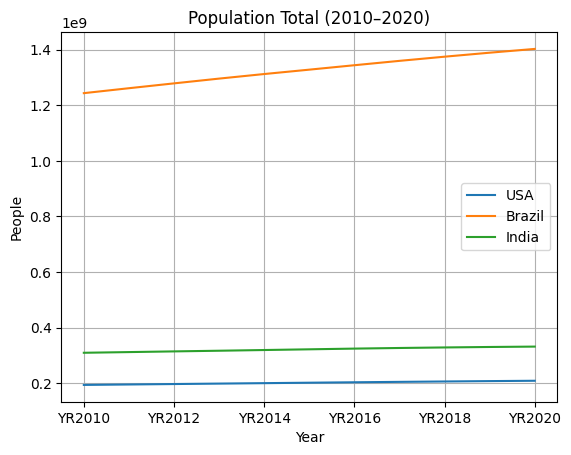

In [67]:
pop.plot(title='Population Total (2010–2020)', ylabel='People')
plt.grid(True)
plt.show()

Between 2010 and 2020, the USA had the highest GDP per capita, while India had the lowest but showed consistent growth. India also had the largest population, growing steadily year after year.

#### Question 5


Find an api of interest to you -- here is a list of some but feel free to google around [api list](https://github.com/public-apis/public-apis).  Ask a specific question that you want to use the data from the api to answer, make an appropriate request of the endpoints and do your best to provide an answer to your question asked.

-------
For example, maybe I'm interested in finding out recent artists similar to Rod Stewart.  I could use the LastFM api for this.  Perhaps you're interested in a lyrical analysis of Drake vs. Kendrick Lamar -- and want to compare the lexical diversity of different tracks; you can use the genius api for this.  Maybe I want to build an app to show a random cat picture with a dad joke.  The cat api and jokes api might work here.

#### Question 6

Use the `praw` api [here](https://praw.readthedocs.io/en/stable/) to extract posts from two subreddits of interest to you.  Create a DataFrame based on the posts that contains columns that you feel are appropriate based on the structure of each post.  At a minimum you want a title of each post, the body, and the subreddit title:

| Title | Text | Subreddit |
| ------- | ------ | ------ |
| If we could shrink ourselves down, <br/>at a certain size we would stop being <br/>able to hear anything because the sound <br/>waves would be too big for our tiny ear holes | None | showerthoughts |
| How do I actually get good at Python? | I wouldn’t call myself <br/>a complete new beginner in programming,<br/> I get the concepts. <br/>I know the basics ... <br/>how did you go from building simple scripts to building <br/>complex and big projects? | learnpython |

#### Question 7

Head over to [books to scrape](https://books.toscrape.com/).  Use `BeautifulSoup` to extract all the book titles and prices and assemble these in a DataFrame with two columns appropriately titled.

#### Question 8

Head over to the [Countries of the World](https://www.scrapethissite.com/pages/simple/) site.  Use requests and BeautifulSoup to scrape all countries (250) data and assemble as a DataFrame with columns:

| Country | Capital | Population | Area (km$^2$) | People/km$^2$ |
| -----  | -------- | ---------  | ------------  | ------------  |
| Andorra | Andorra la Vella | 84000 | 468.0 | 179.49 |